In [6]:
## Importing the dataset
import pandas as pd
iris = pd.read_csv(r"C:\Users\Tokii\Downloads\Datasets Intern\IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# VISUALIZATION

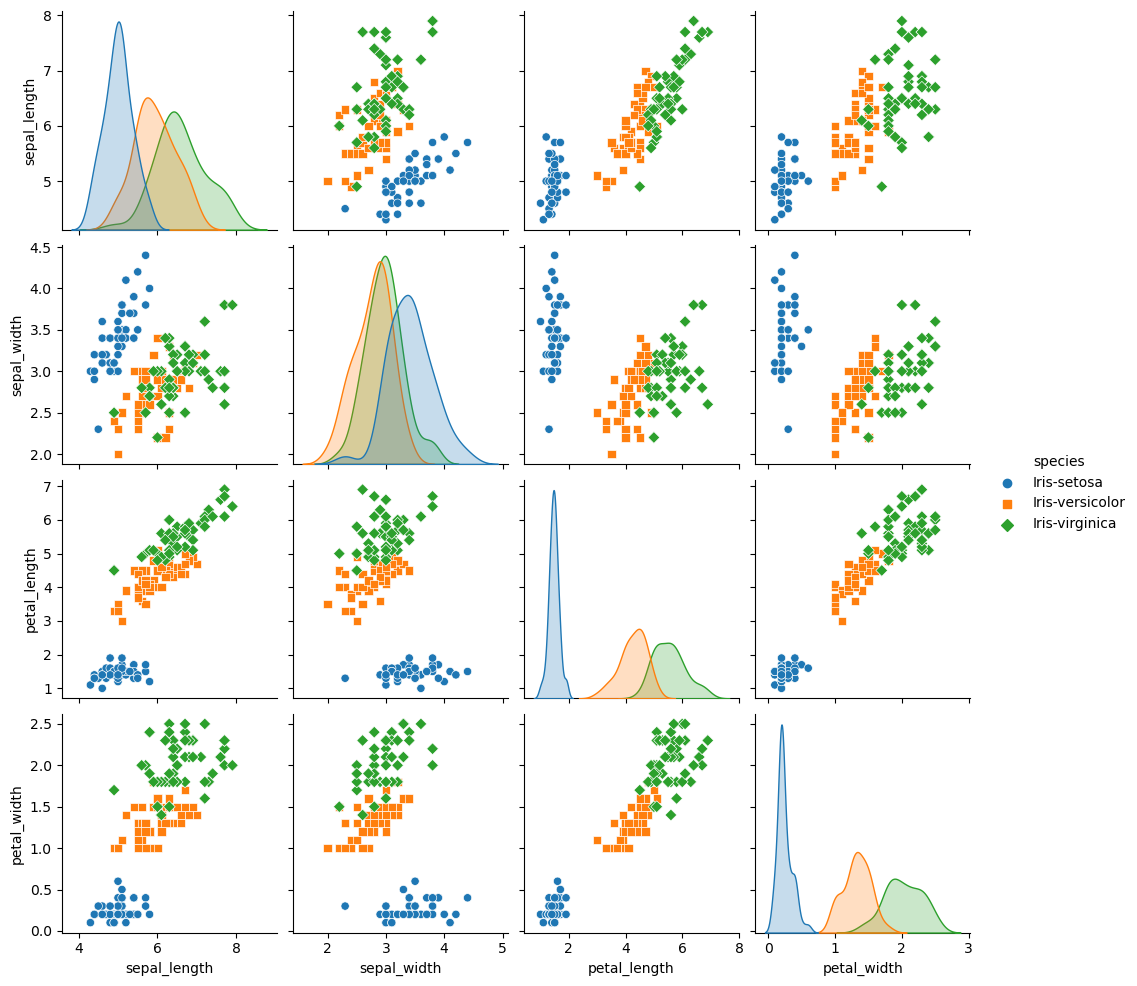

In [7]:
# Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.show()

C:\Users\Tokii\AppData\Local\Temp\ipykernel_12676\989870643.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = iris.corr()


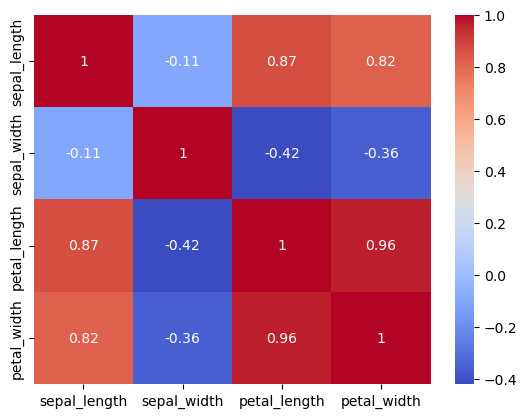

In [8]:
# Correlation Matrix
corr_matrix = iris.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# EDA

In [ ]:
## Preparing the scaled dataframe
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
iris["species"] = encoder.fit_transform(iris["species"])
data = iris.drop(columns=["species"])
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaled_data["species"] = iris["species"]
scaled_data


In [ ]:
## Preparing train and test data from scaled dataframe
from sklearn.model_selection import train_test_split
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state =42)

# BUILDING MODEL

In [ ]:
## Building the SVC Model and evaluating the classfication metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
model1 = SVC()
model1.fit(x_train, y_train)

In [ ]:
## Checking training accuracy 
y_pred_train = model1.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

In [ ]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model1,classes=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [ ]:
## Checking the test accuracy 
y_pred_test = model1.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

In [ ]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model1,classes=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)